In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Documents/CleanDB3.csv', delimiter=';')
df.head()

mapping = {'January': 1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June': 6, 'July': 7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
df['MonthN']=df.Month.map(mapping)

mapping2 = {'1.2 Late delivery from suppliers/subcontractors': 1,
'1.4 Ship Rescheduling/Reallocation : Change of vessel ' : 2,
'1.1 Late issue of AFC documentation':3,
'1.3 Late availability of ships extra costs':4,
'2.1 Incorrect estimate of cost in tender':5,
'2.2 Improper White Book Rates / Escalations':6,
'2.4 Incorrect estimate of allowances/contingencies':7,
'2.5 Improper Contract/Subcontract Flowdown':8,
'3.1 Materials and equipment delivered out-of specs':9,
'3.2 Incomplete or partial delivery':10,
'4.1 Incorrect design engineering':11,
'4.2 Incorrect installation engineering':12,
'4.3 Extra costs/staff cause by final docs delay':13,
'4.5 Incorrect execution offshore by Acergy':14,
'4.6 Incorrect execution offshore by 3rd party':15,
'4.7 Incorrect onshore local logistic':16,
'5. EQUIPMENT BREAKDOWN':17,
'5.1 Lack of preventive maintenance':18,
'5.2 Misuse of equipment':19}
df['CauseN']=df.Causes_details.map(mapping2)

df = df.drop(columns = ['Quarter','Month', 'Main Category', 'Category_details', 'Main_Causes', 'Causes_details'])

In [13]:
df.CauseN.fillna(0.0,inplace=True)

In [15]:
df.isna().sum()

Project    0
FY         0
Amount     0
MonthN     0
CauseN     0
dtype: int64

In [17]:
#converting df columns into np arrays

CauseN_array= df.CauseN.to_numpy()
MonthN_array= df.MonthN.to_numpy()
#Counting the number of values in each array
print(np.count_nonzero(~np.isnan(CauseN_array)),np.count_nonzero(~np.isnan(MonthN_array)))

521 521


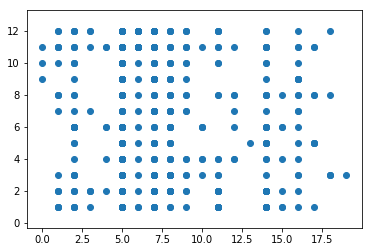

In [20]:
plt.scatter(CauseN_array, MonthN_array)
plt.axis('equal')
plt.show()


In [22]:
# Combining to form only one 2dimension array
combined = np.vstack((CauseN_array, MonthN_array)).T
combined

array([[ 1.,  8.],
       [ 2.,  6.],
       [ 2.,  5.],
       ...,
       [18.,  3.],
       [18., 12.],
       [19.,  3.]])

In [24]:
from sklearn.decomposition import PCA
model = PCA()
pca_features = model.fit_transform(combined)
xs = pca_features[:,0]
ys = pca_features[:,1]

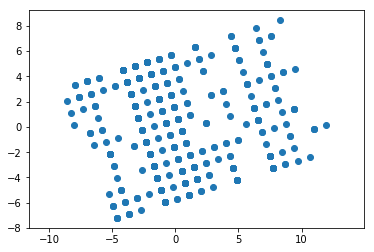

In [26]:
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()
